In [1]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path

In [2]:
dPath = Path("../docs/dumps")

In [3]:
with open(dPath / "train_data.pkl", 'rb') as filename:
    train_data = pickle.load(filename)

with open(dPath / "valid_data.pkl", 'rb') as filename:
    valid_data = pickle.load(filename)

In [ ]:
with open(dPath / "rf_exp_03_names.pkl", 'rb') as filename:
    names = pickle.load(filename)

In [ ]:
all_df = pd.concat([train_data,valid_data], ignore_index=True, axis=0)

In [ ]:
all_df.Detected

In [ ]:
all_df = all_df[list(names) + ["Detected"]]

In [ ]:
all_df.head()

In [ ]:
all_df.MutatorClass.value_counts(normalize=True) * 100

In [ ]:
np.histogram(np.log(all_df.numExecuted))

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.plot(np.log(all_df.numExecuted)/all_df.ppnumberOfStatements, np.log(all_df.ppnumberOfStatements),"o");

In [ ]:
all_df.describe().T

In [ ]:
import seaborn as sns

In [ ]:
copy_data = all_df.copy()

In [ ]:
copy_data['numExecuted'] = np.log(copy_data.numExecuted)

In [ ]:
copy_data['numTestCover'] = np.log(copy_data.numTestCover)

In [ ]:
copy_data['numAssertInTC'] = np.log(all_df.numAssertInTC + 1) 

In [ ]:
sns.pairplot(copy_data[['numExecuted','MutatorClass','numTestCover','numAssertInTC','Detected']].sample(10000), hue="Detected")

In [ ]:
g = sns.FacetGrid(all_df.sample(10000), row="MutatorClass", col="Detected", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "numExecuted", color="steelblue", bins=bins)

In [ ]:
with open(dPath / "test_data.pkl", 'rb') as filename:
    test_data = pickle.load(filename)

In [ ]:
test_data.Detected.value_counts()

In [ ]:
X_train = train_data.drop("Detected", axis=1)

In [ ]:
import scipy.stats

In [ ]:
X_train = X_train[names]

In [ ]:
corr = np.round(scipy.stats.spearmanr(X_train).correlation,1)

In [ ]:
X_train

In [ ]:
mask = np.zeros_like(corr)

In [ ]:
mask[np.triu_indices_from(mask)] = True

In [18]:
from matplotlib import rc

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
csfont = {'family':'Cambria Math', 'size':'18'}
rc('font',**csfont)
rc('text', usetex=True)

In [ ]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 12))
    ax = sns.heatmap(np.abs(corr), mask=mask, square=False, annot=True, xticklabels=names, yticklabels=names, cmap="gray_r")
    f.savefig("rcorr.pdf", bbox_inches='tight')

## Analysis of covered and uncovered files

In [5]:
from pathlib import Path
import pandas as pd
import numpy as np

In [6]:
dPath = Path("../docs/Data")

In [7]:
all_files = []
for file in dPath.iterdir():
    all_files.append(file)

In [8]:
li = []
for file in all_files:
    df = pd.read_csv(file)
    df = df.replace('?',np.NaN)
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    df.dropna(inplace=True)
    li.append(df)

C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93

In [6]:
dPath = Path("../docs/dumps")

In [7]:
with open(dPath / "train_files.pkl", 'rb') as filename:
    train_files = pickle.load(filename)

with open(dPath / "valid_files.pkl", 'rb') as filename:
    valid_files = pickle.load(filename)
    
with open(dPath / "test_files.pkl", 'rb') as filename:
    test_files = pickle.load(filename)

In [8]:
li_train = []
for file in train_files:
    df = pd.read_csv(file)
    df = df.replace('?',np.NaN)
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    df.dropna(inplace=True)
    li_train.append(df)

C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93

In [9]:
li_valid = []
for file in valid_files:
    df = pd.read_csv(file)
    df = df.replace('?',np.NaN)
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    df.dropna(inplace=True)
    li_valid.append(df)

In [10]:
li_test = []
for file in test_files:
    df = pd.read_csv(file)
    df = df.replace('?',np.NaN)
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    df.dropna(inplace=True)
    li_test.append(df)

## Visualize Uncovered Mutants for each project

In [9]:
def compute_the_ratio_of_uncovered(df):
    return df[df['numExecuted']>0].shape[0]/df.shape[0]

In [10]:
all_ratio_uncovered = []
for i in range(len(li)):
    all_ratio_uncovered.append(compute_the_ratio_of_uncovered(li[i]))

In [13]:
train_ratio_uncovered = []
for i in range(len(li_train)):
    train_ratio_uncovered.append(compute_the_ratio_of_uncovered(li_train[i]))

In [14]:
valid_ratio_uncovered = []
for i in range(len(li_valid)):
    valid_ratio_uncovered.append(compute_the_ratio_of_uncovered(li_valid[i]))

In [15]:
test_ratio_uncovered = []
for i in range(len(li_test)):
    test_ratio_uncovered.append(compute_the_ratio_of_uncovered(li_test[i]))

In [11]:
np.mean(all_ratio_uncovered)

0.532764682798252

In [17]:
np.mean(train_ratio_uncovered)

0.5261484426847891

In [18]:
np.mean(valid_ratio_uncovered)

0.6209962231633048

In [19]:
np.mean(test_ratio_uncovered)

0.49829867454995874

In [12]:
n_bins = 10

In [13]:
from matplotlib.ticker import PercentFormatter

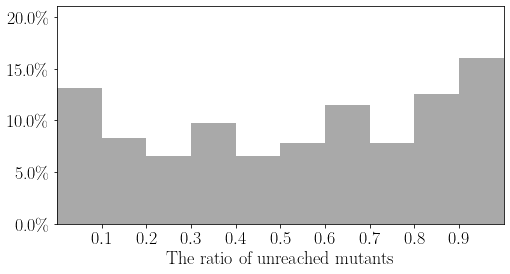

(array([0.13149847, 0.08256881, 0.06574924, 0.09785933, 0.06574924,
       0.07798165, 0.1146789 , 0.07798165, 0.12538226, 0.16055046]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
a = ax.hist(all_ratio_uncovered,cumulative=0, weights=np.ones(len(all_ratio_uncovered)) / len(all_ratio_uncovered), color='darkgrey', bins=n_bins)
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xticks(np.arange(0.1,1,0.1))
ax.set_xlabel("The ratio of unreached mutants")
ax.set_xlim(0,1)
ax.set_ylim(0,0.21)
plt.show()
fig.savefig("AllU.pdf", bbox_inches='tight')
print(a)

findfont: Font family ['Cambria Math'] not found. Falling back to DejaVu Sans.


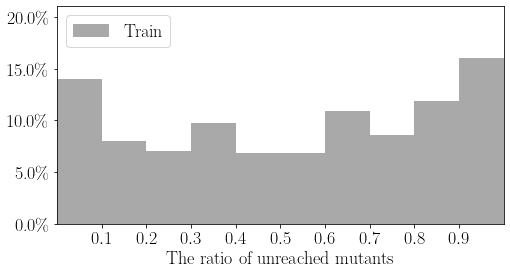

(array([0.13957935, 0.08030593, 0.0707457 , 0.09751434, 0.06883365,
       0.06883365, 0.10898662, 0.08604207, 0.11854685, 0.16061185]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


In [35]:
fig, ax = plt.subplots(figsize=(8, 4))
a = ax.hist(train_ratio_uncovered,cumulative=0, weights=np.ones(len(train_ratio_uncovered)) / len(train_ratio_uncovered), color='darkgrey', bins=n_bins, label='Train')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xticks(np.arange(0.1,1,0.1))
ax.set_xlabel("The ratio of unreached mutants")
ax.set_xlim(0,1)
ax.set_ylim(0,0.21)
ax.legend(loc='upper left')
plt.show()
print(a)
fig.savefig("TrainU.pdf", bbox_inches='tight')


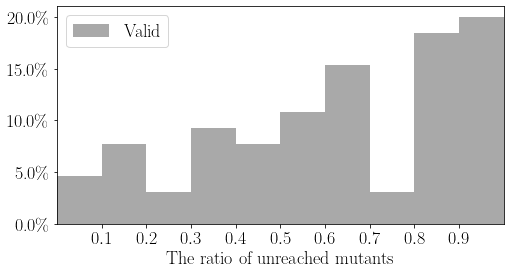

(array([0.04615385, 0.07692308, 0.03076923, 0.09230769, 0.07692308,
       0.10769231, 0.15384615, 0.03076923, 0.18461538, 0.2       ]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
a = ax.hist(valid_ratio_uncovered,cumulative=0, weights=np.ones(len(valid_ratio_uncovered)) / len(valid_ratio_uncovered), color='darkgrey', bins=n_bins, label='Valid')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xticks(np.arange(0.1,1,0.1))
ax.set_xlabel("The ratio of unreached mutants")
ax.set_xlim(0,1)
ax.set_ylim(0,0.21)
ax.legend(loc='upper left')
plt.show()
print(a)
fig.savefig("ValidU.pdf", bbox_inches='tight')

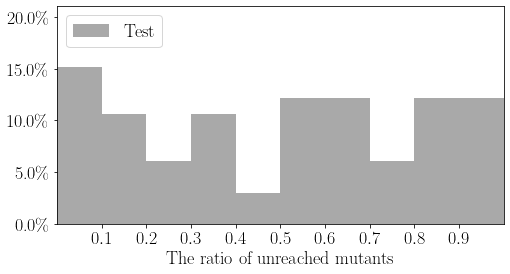

(array([0.15151515, 0.10606061, 0.06060606, 0.10606061, 0.03030303,
       0.12121212, 0.12121212, 0.06060606, 0.12121212, 0.12121212]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


In [37]:
fig, ax = plt.subplots(figsize=(8, 4))
a = ax.hist(test_ratio_uncovered,cumulative=0, weights=np.ones(len(test_ratio_uncovered)) / len(test_ratio_uncovered), color='darkgrey', bins=n_bins, label='Test')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel("The ratio of unreached mutants")
ax.set_xticks(np.arange(0.1,1,0.1))
ax.set_xlim(0,1)
ax.set_ylim(0,0.21)
ax.legend(loc='upper left')
plt.show()
print(a)
fig.savefig("TestU.pdf", bbox_inches='tight')

## Investigate the whole data set

In [14]:
def compute_total_mutants(df):
    return df.shape[0]

In [15]:
li_total_mutants = []
for i in range(len(li)):
    li_total_mutants.append(compute_total_mutants(li[i]))

In [21]:
np.max(li_total_mutants), np.min(li_total_mutants), np.average(li_total_mutants), np.median(li_total_mutants)

(132609, 5, 4636.581039755351, 995.0)

In [35]:
np.quantile(li_total_mutants, q=1), np.quantile(li_total_mutants, q=0.75), np.quantile(li_total_mutants, q=0.5), np.quantile(li_total_mutants, q=0.25),np.quantile(li_total_mutants, q=0),np.average(li_total_mutants)

(132609, 3743.0, 995.0, 354.75, 5, 4636.581039755351)

In [22]:
def compute_ratio_killed_mutants(df):
    return df.Detected.sum() / df.shape[0]

In [23]:
li_ratio_killed_mutants = []
for i in range(len(li)):
    li_ratio_killed_mutants.append(compute_ratio_killed_mutants(li[i]))

In [25]:
len(li_ratio_killed_mutants)

654

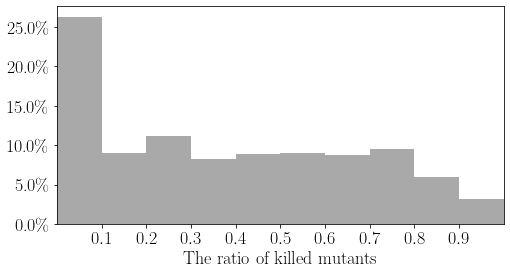

(array([0.26299694, 0.09021407, 0.1116208 , 0.08256881, 0.08868502,
       0.09021407, 0.08715596, 0.09480122, 0.05963303, 0.03211009]), array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), <a list of 10 Patch objects>)


In [36]:
fig, ax = plt.subplots(figsize=(8, 4))
a = ax.hist(li_ratio_killed_mutants,cumulative=0, weights=np.ones(len(li_ratio_killed_mutants)) / len(li_ratio_killed_mutants), color='darkgrey', bins=10)
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xticks(np.arange(0.1,1,0.1))
ax.set_xlabel("The ratio of killed mutants")
ax.set_xlim(0,1)
#ax.set_ylim(0,0.21)
plt.show()
fig.savefig("KilledR.pdf", bbox_inches='tight')
print(a)

In [44]:
np.quantile(li_ratio_killed_mutants, q=1), np.quantile(li_ratio_killed_mutants, q=0.75), np.quantile(li_ratio_killed_mutants, q=0.5), np.quantile(li_ratio_killed_mutants, q=0.25),np.quantile(li_ratio_killed_mutants, q=0),np.average(li_ratio_killed_mutants)

(1.0,
 0.6260079352507675,
 0.34383699150393754,
 0.09267148389161053,
 0.0,
 0.37549470850663114)

In [51]:
def compute_test_cover(df):
    return df.numTestCover.max()

In [52]:
li_test_cover = []
for i in range(len(li)):
    li_test_cover.append(compute_test_cover(li[i]))

In [54]:
np.quantile(li_test_cover, q=1), np.quantile(li_test_cover, q=0.75), np.quantile(li_test_cover, q=0.5), np.quantile(li_test_cover, q=0.25),np.quantile(li_test_cover, q=0),np.average(li_test_cover)

(9835, 36.0, 10.0, 3.0, 0, 71.74006116207951)